## Linear Model Project
Week 2 - 18/09/2025



# Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

from sklearn.model_selection import train_test_split #Split data into training and testing sets for model evaluation.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/Sales.csv")

# Quick check of the data
print(df.head())

    Brands        Models         Colors Memory Storage Camera  Rating  \
0  SAMSUNG  GALAXY M31S    Mirage Black   8 GB  128 GB    Yes     4.3   
1    Nokia           3.2          Steel   2 GB   16 GB    Yes     3.8   
2   realme           C2   Diamond Black   2 GB     NaN    Yes     4.4   
3  Infinix        Note 5       Ice Blue   4 GB   64 GB    Yes     4.2   
4    Apple    iPhone 11           Black    4GB   64 GB    Yes     4.6   

   Selling Price  Original Price                Mobile  Discount  \
0          19330           20999  SAMSUNG GALAXY M31S       1669   
1          10199           10199             Nokia 3.2         0   
2           6999            7999            realme C2       1000   
3          12999           12999        Infinix Note 5         0   
4          49900           49900      Apple iPhone 11          0   

   discount percentage  
0             7.947998  
1             0.000000  
2            12.501563  
3             0.000000  
4             0.000000  


In [2]:
# 3. BASIC INFO

print("Shape of dataset:", df.shape)             # (rows, columns)
print("\nColumn data types:\n", df.dtypes)       # Types of each column
print("\nMissing Or Null values:\n", df.isnull().sum())  # Count of missing values
print("\nDuplicate rows:", df.duplicated().sum())

# Summary statistics for numeric columns
df.describe()

Shape of dataset: (3114, 12)

Column data types:
 Brands                  object
Models                  object
Colors                  object
Memory                  object
Storage                 object
Camera                  object
Rating                 float64
Selling Price            int64
Original Price           int64
Mobile                  object
Discount                 int64
discount percentage    float64
dtype: object

Missing Or Null values:
 Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

Duplicate rows: 108


,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


# Data Cleaning

In [3]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [4]:
# Drop rows with missing Catigorical values
df = df.dropna(subset=["Brands","Models","Colors","Memory", "Storage", "Camera", "Mobile"])   # 7 Columns

In [5]:
# Drop rows with missing numeric values
df = df.dropna(subset=["Rating", "Selling Price" , "Original Price", "Discount", "discount percentage"])    # 5 Columns

In [6]:
# Ensure numeric types
numeric_cols = ["Rating", "Selling Price" , "Original Price", "Discount", "discount percentage"]

# Convert Numeric columns to
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce") # errors="coerce"
        # means:If a value cannot be converted (like a text "N/A"), it will be replaced with NaN (missing value).

print("Missing Values after cleaning:\n\n",df.isnull().sum())
print("\nShape:", df.shape)

Missing Values after cleaning:

 Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64

Shape: (2806, 12)


# EDA

In [7]:
for column in df.columns:
    print(f"\nStatistics for column: {column}") #Iterates through every column in df.
    data = df[column].dropna()

    if pd.api.types.is_numeric_dtype(data): # check if numeric col.
        print("------------------")

        print("Numeric Column")

        arr = data.to_numpy()  # ماتركس Matrix

        mean = np.mean(arr)   # Mean (Average)
        print(f"Mean: {mean}")

        mode = stats.mode(arr, keepdims=True).mode  # Mode
        print(f"Mode: {mode.tolist()}")

        median = np.median(arr) # Median (Middle value)
        print(f"Median: {median}")

        variance = np.var(arr, ddof=1) # Sum of all N: (x-Mean)^2/N
        print(f"Variance: {variance}")

        std_dev = np.std(arr, ddof=1) # Root of Variance
        print(f"Standard Deviation: {std_dev}")

        q75, q25 = np.percentile(arr, [75 ,25]) # Q3-Q1
        iqr = q75 - q25
        print(f"IQR (Interquartile Range): {iqr}")

        z_scores = (arr - mean) / std_dev # x-Mean/std
        print(f"Z-scores:\n{z_scores}")

        data_range = np.ptp(arr)  # ptp = max - min
        print(f"Range (Max - Min): {data_range}")

        print("--------------------")

    else:
        print("--------------------")
        print("Non-numeric Column")

        mode = data.mode().values.tolist()  # Most Feq. Value
        print(f"Mode: {mode}")

        unique_values = np.unique(data)
        print(f"Number of Unique Values: {len(unique_values)}")

        value_counts = data.value_counts()
        print(f"Top Frequent Values:\n{value_counts.head()}")

        print("--------------------")


Statistics for column: Brands
--------------------
Non-numeric Column
Mode: ['SAMSUNG']
Number of Unique Values: 17
Top Frequent Values:
Brands
SAMSUNG    673
realme     276
Apple      257
OPPO       248
Xiaomi     191
Name: count, dtype: int64
--------------------

Statistics for column: Models
--------------------
Non-numeric Column
Mode: ['3']
Number of Unique Values: 877
Top Frequent Values:
Models
3                    25
iPhone 13 Pro Max    19
iPhone 11            19
iPhone 12            18
iPhone 12 Mini       18
Name: count, dtype: int64
--------------------

Statistics for column: Colors
--------------------
Non-numeric Column
Mode: ['Black']
Number of Unique Values: 622
Top Frequent Values:
Colors
Black     429
Gold      176
White     147
Blue      130
Silver     84
Name: count, dtype: int64
--------------------

Statistics for column: Memory
--------------------
Non-numeric Column
Mode: ['4 GB']
Number of Unique Values: 24
Top Frequent Values:
Memory
4 GB    697
3 GB    458

In [8]:
# Save cleaned data
df.to_csv("/content/cleaned_mobile_sales.csv", index=False)

# Visualization

## Plotly

In [9]:
# Import libraries
import pandas as pd
import plotly.express as px  # Plotly Express for creating interactive charts


# Load dataset
df = pd.read_csv("/content/cleaned_mobile_sales.csv")


# Define color palette

colors = [
    '#6187D6', '#D6D1E7', '#ABA9DE', '#B4C2E3',
    '#84A7DD', '#A093DA', '#DADDE9', '#A0BBE2',
    '#E8E8EC', '#BFDBFE', '#E0F2FE', '#8680D6',
    "#968BB0", "#ABCAE0"
]


# Top Models by Selling Price
top_models = (
    df.groupby('Models', as_index=False)['Selling Price']
    .mean()  # Calculate the average selling price for each model
    .sort_values(by='Selling Price', ascending=False)  # Sort in descending order
    .head(10)  # Select the top 10 models
)

# Create a horizontal bar chart
fig_top_models = px.bar(
    top_models,
    x='Selling Price',  # X-axis: Average selling price
    y='Models',         # Y-axis: Model names
    orientation='h',    # Horizontal bars
    text=top_models['Selling Price'].round(2),  # Display the price on each bar
    title='Top Models by Selling Price',        # Chart title
    color='Selling Price',                       # Color by selling price
    color_continuous_scale=colors               # Use the custom color palette
)

# Customize layout
fig_top_models.update_layout(
    yaxis={'categoryorder': 'total ascending'},  # Sort models by total value
    xaxis_title='Average Selling Price',          # X-axis label
    yaxis_title='Model',                          # Y-axis label
    height=500                                    # Chart height
)

# Display the bar chart
fig_top_models.show()



# Sales Distribution by Memory
# Create a pie chart
fig_pie = px.pie(
    df,
    names='Memory',                # Group by memory capacity
    values='Selling Price',        # Slice size = total selling price
    title='Sales Distribution by Memory',  # Chart title
    color_discrete_sequence=colors  # Use the same color palette
)

# Display the pie chart
fig_pie.show()


# Modeling: Linear Regression

# Numerice Features

In [10]:
# y= m(x)+b
# import statsmodels.api as sm
y = df["Selling Price"].astype(float)
X = df[["Rating", "Discount", "discount percentage", "Original Price"]].astype(float)

In [11]:
# Add intercept (m)
# Col of 1ns next to the X
X = sm.add_constant(X, has_constant="add") # Allows the model to calculate the intercept(b) automatically.

In [12]:
# Fit model
model_numeric = sm.OLS(y, X).fit()  #Ordinary Least Squares regression
# .fit() Fits the model to my data (finds the best coefficients that minimize the sum of squared errors, SSE).
print(model_numeric.summary())
modelLR = model_numeric.summary()

                            OLS Regression Results                            
Dep. Variable:          Selling Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.945e+33
Date:                Sun, 21 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:29:55   Log-Likelihood:                 65879.
No. Observations:                2806   AIC:                        -1.317e+05
Df Residuals:                    2801   BIC:                        -1.317e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.204e-10   4


 Plotting regression for: Rating


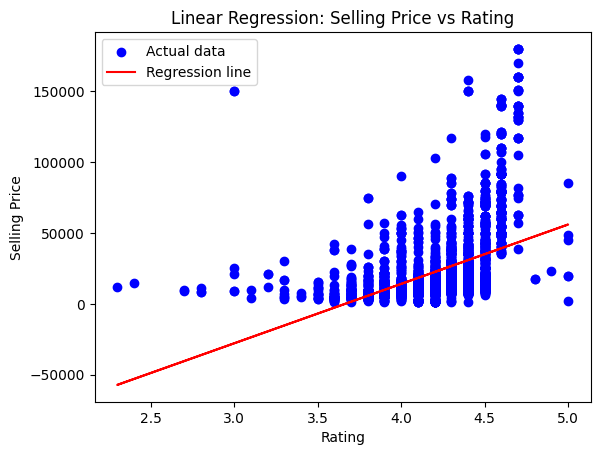


 Plotting regression for: Discount


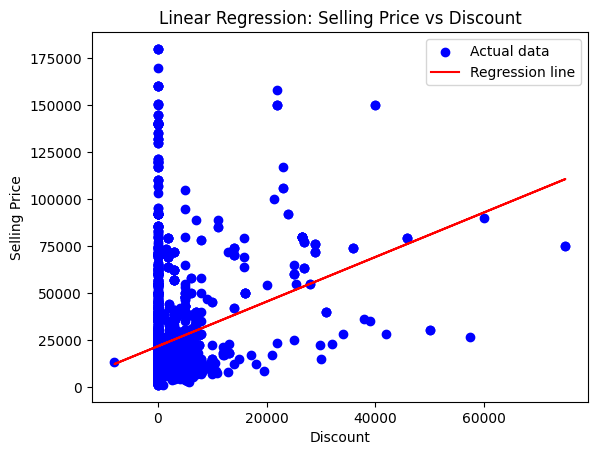


 Plotting regression for: discount percentage


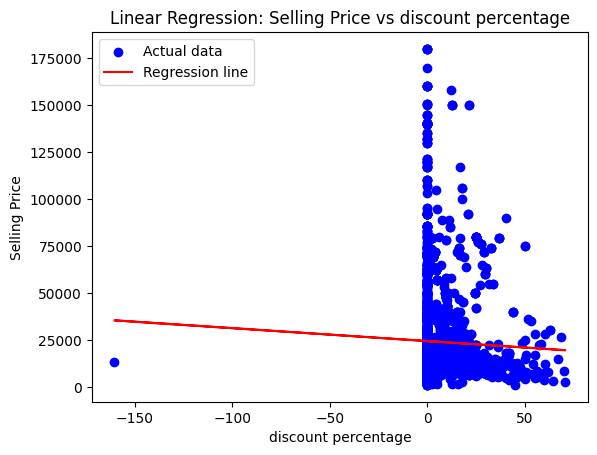


 Plotting regression for: Original Price


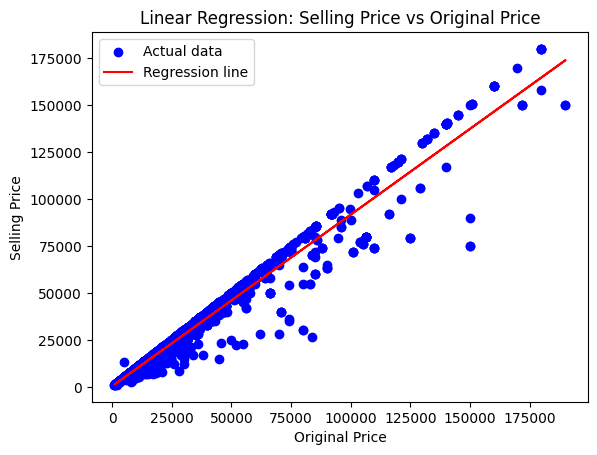

In [13]:
# Regression plots for numeric features

for feature in ["Rating", "Discount", "discount percentage", "Original Price"]:
    print(f"\n Plotting regression for: {feature}")
    X_single = sm.add_constant(X[[feature]])
    model_single = sm.OLS(y, X_single).fit()
    y_pred_single = model_single.predict(X_single)

    # Plot Scatter رسمه
    plt.scatter(X[feature], y, color="blue", label="Actual data")
    plt.plot(X[feature], y_pred_single, color="red", label="Regression line")
    plt.xlabel(feature)
    plt.ylabel("Selling Price")
    plt.title(f"Linear Regression: Selling Price vs {feature}")
    plt.legend()
    plt.show()

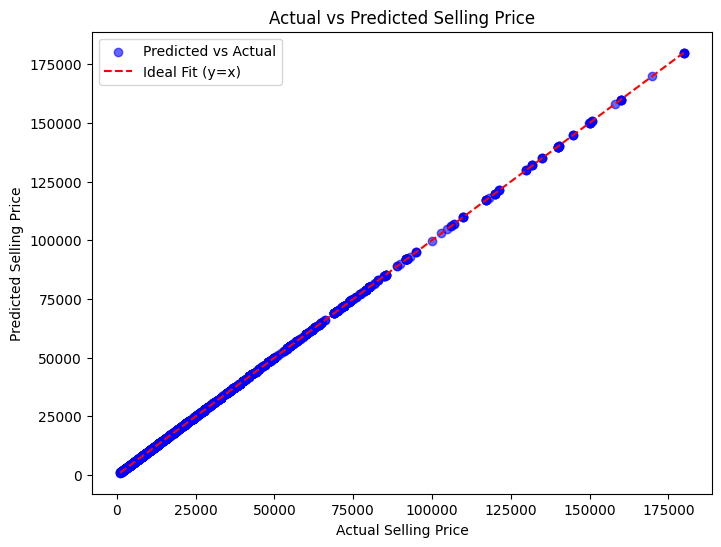

In [14]:
y_pred = model_numeric.predict(X)

plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Ideal Fit (y=x)")

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.



Best alpha: 0.001
Mean Squared Error: 25319723.30
R² Score: 0.96
Intercept: -4713.67
          Feature  Coefficient
0          Rating     0.000002
1  Original Price     1.182437
2        Discount    -0.992863


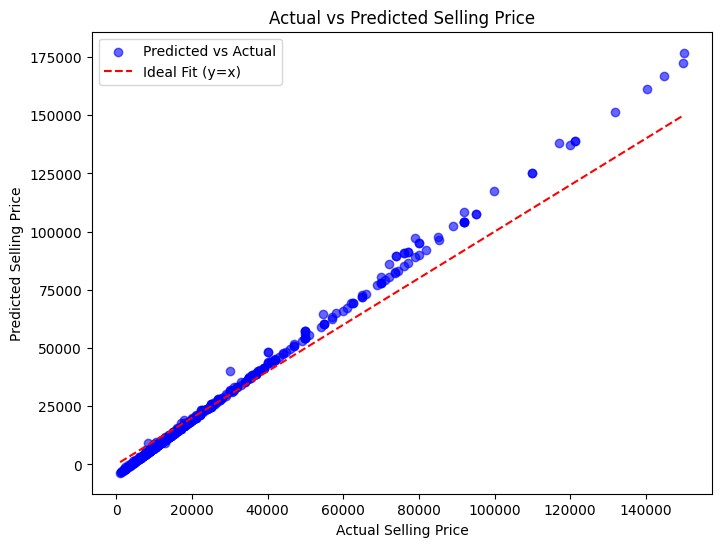

In [15]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualization
from sklearn.linear_model import RidgeCV  # Ridge Regression with cross-validation
from sklearn.model_selection import train_test_split  # Split data into train/test
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics

# ===============================
# Select features and target
# ===============================
features = ["Rating", "Original Price", "Discount"]  # Predictor columns
X = df[features].astype(float)  # Convert features to float type
y = df["Selling Price"].astype(float)  # Target variable

# ===============================
# Split dataset into train and test sets
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  # 80% train, 20% test, random_state ensures reproducibility

# ===============================
# Define range of alpha values for Ridge regularization
# ===============================
alphas = np.logspace(-3, 3, 100)  # 100 values from 0.001 to 1000 on log scale

# ===============================
# Initialize Ridge regression with cross-validation
# ===============================
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)  # Fit model on training data

# Get best alpha value found by cross-validation
best_alpha = ridge_cv.alpha_
print("Best alpha:", round(best_alpha, 4))

# ===============================
# Make predictions on the test set
# ===============================
y_pred = ridge_cv.predict(X_test)

# ===============================
# Evaluate the model
# ===============================
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² score
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# ===============================
# Display coefficients and intercept
# ===============================
coeff_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": ridge_cv.coef_  # Coefficients of each feature
})
print("Intercept:", round(ridge_cv.intercept_, 2))
print(coeff_df)

# ===============================
# Scatter plot: Actual vs Predicted
# ===============================
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")  # Actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="Ideal Fit (y=x)")  # Perfect prediction line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.legend()
plt.show()

#Model: Random Forset

### Random Forest - Categorical Features

In [16]:
# Categorical features only
cat_features = ["Brands", "Models", "Colors", "Memory", "Storage", "Camera", "Mobile"]
cat_features = [c for c in cat_features if c in df.columns]

In [17]:
X_cat = df[cat_features].fillna("Unknown").astype(str)
y_cat = df["Selling Price"].astype(float)

In [18]:
# One-hot encode categorical
X_cat = pd.get_dummies(X_cat, drop_first=True)

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)

In [20]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Predictions
y_pred = rf.predict(X_test)

In [22]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance:")
print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R²: {r2:.2f}")

Random Forest Performance:
Random Forest MSE: 61460319.54
Random Forest R²: 0.90


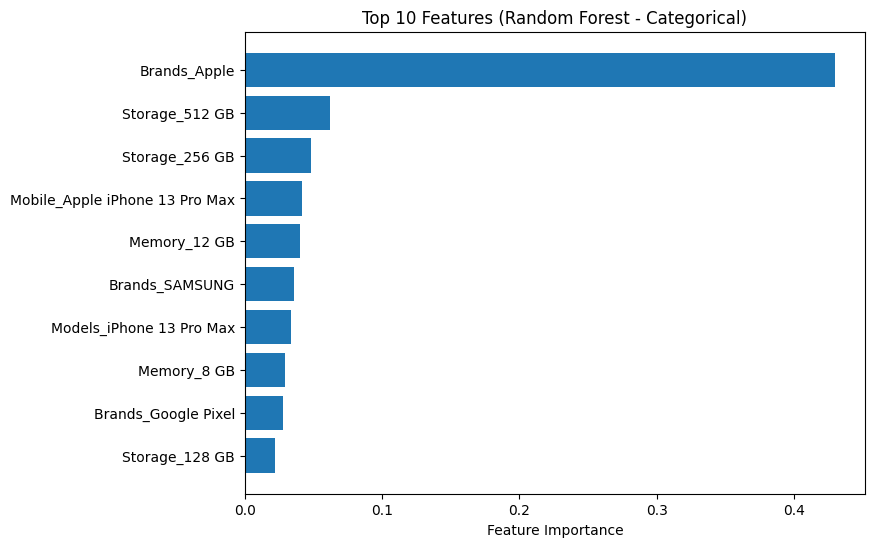

In [23]:
# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X_cat.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Features (Random Forest - Categorical)")
plt.show()

# Dashboard

# Streamlit

In [24]:
#steamlit insallation

!pip install streamlit pandas plotly pyngrok
!pip install streamlit pyngrok -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.0 MB/s eta 0:00:00


In [25]:
# Creating a Python file
%%writefile mobiledashboard.py

# Importing required libraries:
import streamlit as st                             # Streamlit library for dashboard UI
import pandas as pd                                # Pandas library for data manipulation
import matplotlib.pyplot as plt                    # Matplotlib for plotting charts
from matplotlib.ticker import StrMethodFormatter   # For formatting y-axis numbers
import plotly.express as px                        # Plotly Express for building interactive charts



# Page settings
st.set_page_config(
    page_title="Mobile Sales Dashboard",           # Title of the web page
    layout="wide"                                  # Wide layout to use full screen width
    )

# Custom CSS styling for theme
st.markdown("""
<style>
body { background-color: #F9FAFB; color: #111827; }
.sidebar .sidebar-content { background-color: #E5E7EB; color: #111827; }
</style>
""", unsafe_allow_html=True)


#Loads the dataset from a CSV file into a Pandas DataFrame
df = pd.read_csv("/content/cleaned_mobile_sales.csv")

# Sidebar: Filters and dataset information
st.sidebar.header("Filters & Dataset Info")

# Show a brief description of the dataset
st.sidebar.markdown("Dataset Description")
st.sidebar.markdown("""
This dataset contains Mobile sales data including:
- Rating, Selling Price
- Original Price
- Mobile, Models
""")

#interactive filters in the sidebar to allow users to select specific brands or memory
with st.sidebar:
    st.header("🔍 Filters")
    selected_brands = st.multiselect("Select Brands", options=sorted(df['Brands'].unique()))
    selected_memory = st.multiselect("Select memory", options=sorted(df['Memory'].astype(str).unique()))

# Apply filters without modifying the original dataframe
filtered_df = df.copy()
if selected_brands:
    filtered_df = filtered_df[filtered_df['Brands'].isin(selected_brands)]
if selected_memory:
    filtered_df = filtered_df[filtered_df['Memory'].astype(str).isin(selected_memory)]

#Page main header
st.title("Mobile Sales Dashboard")



# KPI Metrics
# Displays 4 KPI cards
if not filtered_df.empty:
    col1, col2, col3, col4 = st.columns(4)
    #Total number of mobiles
    col1.metric("Total Mobiles", filtered_df.shape[0])
    #Average selling price
    col2.metric("Average Selling Price", f"${filtered_df['Selling Price'].mean():,.2f}")
    #Maximum selling price
    col3.metric("Max Selling Price", f"${filtered_df['Selling Price'].max():,.2f}")
    #Average customer rating
    col4.metric("Average Rating", f"{filtered_df['Rating'].mean():.2f}")

# If no data matches the filters, a warning is shown instead.
else:
    st.warning("No data available for the selected filters.")


# Charts and Dashboard
# Define colors
colors = [
    '#6187D6', '#D6D1E7', '#ABA9DE', '#B4C2E3',
    '#84A7DD', '#A093DA', '#DADDE9', '#A0BBE2',
    '#E8E8EC', '#BFDBFE', '#E0F2FE', '#8680D6',
    "#968BB0", "#ABCAE0"
]

# Histogram for column user selected
columns_for_hist = ['Rating', 'Selling Price', 'Original Price', 'Memory', 'Storage']
selected_column = st.selectbox("Choose column for Histogram", options=columns_for_hist)

fig_hist = px.histogram(
    filtered_df,
    x=selected_column,
    nbins=10,
    title=f'Distribution of {selected_column}',
    color_discrete_sequence=colors
)
st.plotly_chart(fig_hist, use_container_width=True)


# First row:
r1c1, r1c2 = st.columns(2)
# Bar chart : count of mobiles by brands
with r1c1:
   # st.subheader("Count of Mobiles by Brands")
    brand_count = (
        filtered_df.groupby('Brands')
        .size()
        .reset_index(name='Count')
    )
    fig_brand_count = px.bar(
        brand_count,
        x='Brands',
        y='Count',
        text_auto=True,
        title='Number of Mobiles by Brand',
        color='Count',
        color_continuous_scale=colors
    )
    fig_brand_count.update_layout(
        xaxis_title='Brand',
        yaxis_title='Number of Models',
        xaxis={'categoryorder': 'total descending'},
        height=500
    )
    st.plotly_chart(fig_brand_count, use_container_width=True)

# Bar chart :Top Models by Selling Price
with r1c2:
   # st.subheader("Top Models by Selling Price")
    top_models = (
        filtered_df.groupby('Models', as_index=False)['Selling Price']
        .mean()
        .sort_values(by='Selling Price', ascending=False)
        .head(10)
    )
    fig_bar = px.bar(
        top_models,
        x='Selling Price',
        y='Models',
        orientation='h',
        text_auto='.2f',
        title='Top Models by Selling Price',
        color='Selling Price',
        color_continuous_scale=colors
    )
    fig_bar.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        xaxis_title='Average Selling Price',
        yaxis_title='Model',
        height=500
    )
    st.plotly_chart(fig_bar, use_container_width=True)


# Second Row
r2c1, r2c2 = st.columns(2)

# Bar chart : Average Selling Price by Brand
with r2c1:
    bar_df = filtered_df.groupby('Brands', as_index=False)['Selling Price'].mean()
    fig_bar = px.bar(
        bar_df, x='Brands', y='Selling Price',
        title='Average Selling Price by Brand',
        text_auto='.2f', color='Brands',
        color_discrete_sequence=colors
    )
    st.plotly_chart(fig_bar, use_container_width=True)

# pie chart : selling price distribution by memory
with r2c2:
    fig_pie = px.pie(
        filtered_df, names='Memory', values='Selling Price',
        title='Sales Distribution by Memory',
        color_discrete_sequence=colors
    )
    st.plotly_chart(fig_pie, use_container_width=True)

# 3rd Row
# boxplot : selling price distribution by brand
fig_box = px.box(
    filtered_df, x='Brands', y='Selling Price',
    color='Brands',
    title='Selling Price Distribution by Brand',
    color_discrete_sequence=colors
    )
st.plotly_chart(fig_box, use_container_width=True)

Writing mobiledashboard.py


In [26]:
#Setup the ngrok authentication in Colab
# ngrok is a tool that creates a secure public URL for your local server or app.
!ngrok authtoken 32bJAa5wxdXtCSD0RliIWd7s5qc_3vz2MP1M2jz5ZCyKdse2s


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [27]:
# Import the pyngrok library to manage ngrok tunnels in Python
from pyngrok import ngrok

# Kill any previous tunnels
ngrok.kill()


In [28]:
# Start a new ngrok tunnel on port 8501 (default Streamlit port)
url = ngrok.connect(8501)

# Print the public URL to open in browser
print(f"Streamlit app is live at: {url}")

# Run Streamlit in the background
!streamlit run /content/mobiledashboard.py &>/dev/null &

Streamlit app is live at: NgrokTunnel: "https://5dadfbb5074f.ngrok-free.app" -> "http://localhost:8501"
